In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle

%matplotlib inline

In [2]:
echonest = pd.read_csv('echonest.csv')
tracks = pd.read_csv('tracks.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types. Spec

In [3]:
echonest['Unnamed: 0'][1] = 'Track_ID'
echonest.columns = echonest.iloc[1]
echonest = echonest.drop(echonest.index[[0,1,2]])

In [4]:
echonest.columns.values

array(['Track_ID', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'album_date', 'album_name', 'artist_latitude', 'artist_location',
       'artist_longitude', 'artist_name', 'release',
       'artist_discovery_rank', 'artist_familiarity_rank',
       'artist_hotttnesss_rank', 'song_currency_rank',
       'song_hotttnesss_rank', 'artist_discovery', 'artist_familiarity',
       'artist_hotttnesss', 'song_currency', 'song_hotttnesss', '000',
       '001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062'

In [5]:
tracks['Unnamed: 0'][0] = 'Track_ID'
tracks.columns = tracks.columns + '_' + tracks.iloc[0]
tracks = tracks.drop(tracks.index[[0,1]])

In [6]:
tracks.head()

,Unnamed: 0_Track_ID,album_comments,album.1_date_created,album.2_date_released,album.3_engineer,album.4_favorites,album.5_id,album.6_information,album.7_listens,album.8_producer,...,track.10_information,track.11_interest,track.12_language_code,track.13_license,track.14_listens,track.15_lyricist,track.16_number,track.17_publisher,track.18_tags,track.19_title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [7]:
tracks.drop(tracks.columns[[1,2,4,5,7,9,10,13,14,15,16,17,18,19,27,28,29,30,34,35,36,37,43,46,48,50,51]], 1, inplace=True)

In [8]:
tracks = tracks.rename(columns={'Unnamed: 0_Track_ID': 'Track_ID','track.7_genre_top':'Top_Genre','track.8_genres':'Genre'})

In [9]:
tracks.columns.values

array(['Track_ID', 'album.2_date_released', 'album.5_id',
       'album.7_listens', 'album.10_title', 'album.11_tracks',
       'artist.6_favorites', 'artist.7_id', 'artist.8_latitude',
       'artist.9_location', 'artist.10_longitude', 'artist.11_members',
       'artist.12_name', 'set_split', 'set.1_subset', 'track_bit_rate',
       'track.5_duration', 'track.6_favorites', 'Top_Genre', 'Genre',
       'track.9_genres_all', 'track.11_interest', 'track.12_language_code',
       'track.14_listens', 'track.16_number', 'track.19_title'], dtype=object)

In [10]:
tracks_genre = tracks[['Track_ID', 'Top_Genre']]
tracks_genre = tracks_genre.dropna(subset = ['Top_Genre'])

In [11]:
tracks_genre['Top_Genre'].value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: Top_Genre, dtype: int64

In [12]:
top_genre = pd.DataFrame(tracks_genre['Top_Genre'].value_counts()[0:10])

In [13]:
top_genre.index

Index([u'Rock', u'Experimental', u'Electronic', u'Hip-Hop', u'Folk', u'Pop',
       u'Instrumental', u'International', u'Classical', u'Jazz'],
      dtype='object')

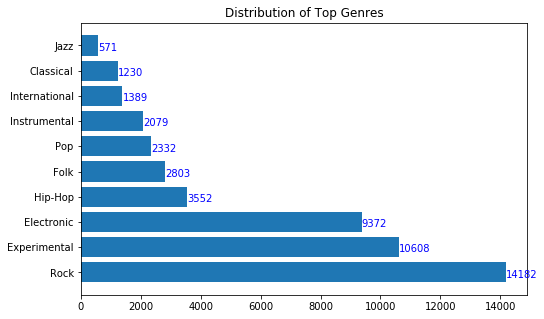

In [14]:
plt.subplots(1,1,figsize=(8,5))
plt.barh(np.arange(1,11,1),top_genre['Top_Genre'])
labels = top_genre.index
plt.yticks(np.arange(1,11,1), labels)
plt.title('Distribution of Top Genres')

for i, v in enumerate(top_genre['Top_Genre']):
    plt.text(v + 6, i + 0.8, str(v), color='blue', fontweight='normal')

In [15]:
tracks_genre = tracks_genre[(tracks_genre.Top_Genre == 'Rock')|(tracks_genre.Top_Genre == 'Experimental')|(tracks_genre.Top_Genre == 'Electronic')|(tracks_genre.Top_Genre == 'Hip-Hop')| (tracks_genre.Top_Genre == 'Folk')| (tracks_genre.Top_Genre == 'Pop')| (tracks_genre.Top_Genre=='Instrumental')| (tracks_genre.Top_Genre=='International')| (tracks_genre.Top_Genre=='Classical')| (tracks_genre.Top_Genre=='Jazz')]
pickle.dump(tracks_genre, open('tracks_genre.p', 'wb'))
tracks_genre = pickle.load(open('tracks_genre.p', 'rb'))

In [9]:
with open('tracks_genre.p', 'rb') as f:
    tracks_genre = pickle.load(f, encoding='latin1') 

Baseline model accuracy score

In [16]:
baseline_accuracy = tracks_genre[tracks_genre.Top_Genre == 'Rock'].shape[0]/tracks_genre.shape[0]
baseline_accuracy

0

In [17]:
tracks_genre.reset_index().head()

,index,Track_ID,Top_Genre
0,2,2,Hip-Hop
1,3,3,Hip-Hop
2,4,5,Hip-Hop
3,5,10,Pop
4,11,134,Hip-Hop


In [18]:
echonest.columns.values

array(['Track_ID', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'album_date', 'album_name', 'artist_latitude', 'artist_location',
       'artist_longitude', 'artist_name', 'release',
       'artist_discovery_rank', 'artist_familiarity_rank',
       'artist_hotttnesss_rank', 'song_currency_rank',
       'song_hotttnesss_rank', 'artist_discovery', 'artist_familiarity',
       'artist_hotttnesss', 'song_currency', 'song_hotttnesss', '000',
       '001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062'

In [19]:
echonest_clean = echonest[['Track_ID', 'acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_discovery','artist_familiarity','artist_hotttnesss']]
pickle.dump(echonest_clean, open('echonest.p', 'wb'))
echonest_clean = pickle.load(open('echonest.p', 'rb'))

In [10]:
with open('echonest.p', 'rb') as f:
    echonest = pickle.load(f, encoding='latin1') 

In [20]:
df = tracks_genre.merge(echonest_clean, on='Track_ID')

In [21]:
df.columns.values

array(['Track_ID', 'Top_Genre', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'artist_discovery', 'artist_familiarity', 'artist_hotttnesss'], dtype=object)

In [22]:
#label encoder for the categorical target
le = LabelEncoder()
le.fit(df['Top_Genre'])

LabelEncoder()

In [23]:
df['Top_Genre'] = le.transform(df['Top_Genre'])
df['Top_Genre'] = df['Top_Genre'].astype('category')
df['Top_Genre'].head()

0    4
1    4
2    4
3    8
4    4
Name: Top_Genre, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [24]:
pickle.dump(df, open('df.p', 'wb'))
df = pickle.load(open('df.p', 'rb'))
df.head()

,Track_ID,Top_Genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss
0,2,4,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,0.3889898648,0.3867400000,0.4063700000
1,3,4,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,0.3889898648,0.3867400000,0.4063700000
2,5,4,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,0.3889898648,0.3867400000,0.4063700000
3,10,8,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,0.5573390067,0.6142720000,0.7983870000
4,134,4,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,0.3889898648,0.3867400000,0.4063700000


In [11]:
with open('df.p', 'rb') as f:
    df = pickle.load(f, encoding='latin1') 

A lot of features but they are all merged

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

Build KNN model

In [23]:
X = df.drop(['Track_ID', 'Top_Genre'], axis=1)
y = df['Top_Genre']

In [24]:
X = X.astype('float')

In [28]:
cross_valiator = KFold(n_splits = 5, shuffle=True, random_state=4444)

In [29]:
knn = KNeighborsClassifier(weights='distance')
k = np.arange(1,21,1)
parameters = {'n_neighbors':k}
clf_knn = GridSearchCV(knn,parameters,cv=cross_valiator)
clf_knn.fit(X,y);

In [30]:
pickle.dump(clf_knn, open('clf_knn.p', 'wb'))
clf_knn = pickle.load(open('clf_knn.p', 'rb'))

In [12]:
with open('clf_knn.p', 'rb') as f:
    clf_knn = pickle.load(f, encoding='latin1') 

/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [31]:
clf_knn.best_params_

{'n_neighbors': 15}

In [32]:
clf_knn.best_score_

0.5327213114754098

In [33]:
cross_val_score(clf_knn, X, y, scoring='accuracy', cv=cross_valiator)

array([ 0.53967213,  0.52393443,  0.51672131,  0.53508197,  0.51213115])

In [34]:
#generate classification report
y_pred = cross_val_predict(clf_knn, X, y, cv=cross_valiator)
target_names = np.unique(le.inverse_transform(df['Top_Genre']))
print(classification_report(y, y_pred, target_names=target_names))

               precision    recall  f1-score   support

    Classical       0.29      0.15      0.20       199
   Electronic       0.52      0.44      0.48      1749
 Experimental       0.00      0.00      0.00        17
         Folk       0.31      0.25      0.28       794
      Hip-Hop       0.58      0.40      0.48       758
 Instrumental       0.12      0.01      0.03        69
International       0.08      0.01      0.02       115
         Jazz       0.14      0.05      0.07       188
          Pop       0.15      0.03      0.06       296
         Rock       0.57      0.78      0.66      3440

  avg / total       0.49      0.53      0.49      7625



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Build Logistic Regression model

In [35]:
log = LogisticRegression(multi_class='multinomial', solver='lbfgs')
c = np.linspace(1e-10,1,30)
parameters = {'C':c}
clf_log = GridSearchCV(log, parameters, cv=cross_valiator)
clf_log.fit(X,y);

In [36]:
pickle.dump(clf_log, open('clf_log.p', 'wb'))
clf_log = pickle.load(open('clf_log.p', 'rb'))

In [15]:
with open('clf_log.p', 'rb') as f:
    clf_log = pickle.load(f, encoding='latin1') 

/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
clf_log.best_params_

{'C': 0.65517241382758618}

In [17]:
clf_log.best_score_

0.58124590163934431

In [18]:
clf_log.best_estimator_.coef_

array([[  1.29777795e+00,  -4.08755570e-01,  -1.23589503e+00,
          4.61875992e-01,   7.68514132e-02,  -1.31238912e-01,
         -7.73195665e-03,  -4.19262781e-01,   6.13575640e-02,
         -1.95502693e-01,   5.08073954e-02],
       [ -2.38103564e+00,   2.11576775e+00,   9.17568485e-01,
          2.26016741e+00,  -5.28169616e-02,   4.06614836e-01,
          2.63337999e-03,  -5.12775067e-01,  -1.75853173e-01,
         -4.54382034e-01,  -2.46802368e-01],
       [ -5.70180409e-02,  -1.59621575e-02,  -4.96937830e-02,
         -8.67161662e-02,  -2.16733486e-02,  -1.41956811e-02,
         -1.70423390e-02,   2.73381187e-02,  -7.17570335e-02,
         -6.01617827e-02,  -7.88114176e-02],
       [  2.38608227e+00,  -3.27529941e-01,  -1.95813549e+00,
         -5.43908718e-03,  -2.58044028e-01,  -3.83685678e-01,
          5.78174312e-04,  -4.76005358e-01,   3.90580040e-01,
          4.20595879e-01,   4.13804580e-01],
       [ -9.62087868e-01,   1.54705339e+00,   4.83159504e-01,
         -1.91

In [51]:
cross_val_score(clf_log, X, y, scoring='accuracy', cv=cross_valiator)

KeyboardInterrupt: 

In [52]:
y_pred = cross_val_predict(clf_log, X, y, cv=cross_valiator)
print(classification_report(y, y_pred, target_names=target_names))

               precision    recall  f1-score   support

    Classical       0.00      0.00      0.00       199
   Electronic       0.56      0.52      0.54      1749
 Experimental       0.00      0.00      0.00        17
         Folk       0.36      0.45      0.40       794
      Hip-Hop       0.53      0.44      0.48       758
 Instrumental       0.00      0.00      0.00        69
International       0.00      0.00      0.00       115
         Jazz       0.00      0.00      0.00       188
          Pop       0.00      0.00      0.00       296
         Rock       0.64      0.81      0.71      3440

  avg / total       0.51      0.58      0.54      7625



Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=200, random_state=4444)
parameters = {"max_features"      : np.arange(2,12,1),
             "criterion"        :['gini','entropy']}
clf_rfc = GridSearchCV(rfc, parameters, cv=cross_valiator)
clf_rfc.fit(X,y)

KeyboardInterrupt: 

In [ ]:
pickle.dump(clf_rfc, open('clf_rfc.p', 'wb'))
clf_rfc = pickle.load(open('clf_rfc.p', 'rb'))

In [19]:
with open('clf_rfc.p', 'rb') as f:
    clf_rfc = pickle.load(f, encoding='latin1') 

/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/kevinzhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.18.2 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [20]:
clf_rfc.best_params_

{'criterion': 'entropy', 'max_features': 2}

In [21]:
#allow np array to print entirety
np.set_printoptions(threshold=1000)

In [25]:
features = X.columns
feature_label = zip(features,clf_rfc.best_estimator_.feature_importances_)
for feature in feature_label:
    print(feature)

('acousticness', 0.1168201696251554)
('danceability', 0.12004975096529731)
('energy', 0.12054415652618232)
('instrumentalness', 0.081547259128184224)
('liveness', 0.050619718076262525)
('speechiness', 0.11017450150086866)
('tempo', 0.061498979716862266)
('valence', 0.067807364005803089)
('artist_discovery', 0.085825506134171115)
('artist_familiarity', 0.097043749806330779)
('artist_hotttnesss', 0.088068844514882158)


In [63]:
clf_rfc.best_score_

0.74570491803278693

In [66]:
import plotly.plotly as py
import plotly.graph_objs as go

In [67]:
labels = features
values = clf_rfc.best_estimator_.feature_importances_

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kyz682/0 or inside your plot.ly account where it is named 'basic_pie_chart'


Cross validation and classification report for Random Forest are taking forever to run...

### Find second most probable genre for each model

In [68]:
#Allow entire matrix to be shown
np.set_printoptions(threshold=np.nan)
clf_rfc.predict_proba(X)

array([[ 0.   ,  0.055,  0.   ,  0.015,  0.865,  0.   ,  0.   ,  0.   ,
         0.005,  0.06 ],
       [ 0.   ,  0.09 ,  0.   ,  0.   ,  0.775,  0.   ,  0.   ,  0.   ,
         0.01 ,  0.125],
       [ 0.   ,  0.045,  0.   ,  0.01 ,  0.885,  0.   ,  0.005,  0.   ,
         0.01 ,  0.045],
       [ 0.   ,  0.1  ,  0.   ,  0.025,  0.   ,  0.005,  0.015,  0.   ,
         0.65 ,  0.205],
       [ 0.   ,  0.105,  0.   ,  0.005,  0.8  ,  0.005,  0.   ,  0.   ,
         0.005,  0.08 ],
       [ 0.   ,  0.095,  0.   ,  0.63 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.275],
       [ 0.   ,  0.105,  0.   ,  0.685,  0.015,  0.005,  0.   ,  0.005,
         0.05 ,  0.135],
       [ 0.   ,  0.025,  0.   ,  0.895,  0.   ,  0.005,  0.005,  0.   ,
         0.005,  0.065],
       [ 0.   ,  0.035,  0.   ,  0.675,  0.   ,  0.   ,  0.   ,  0.01 ,
         0.01 ,  0.27 ],
       [ 0.   ,  0.045,  0.005,  0.01 ,  0.02 ,  0.01 ,  0.   ,  0.71 ,
         0.005,  0.195],
       [ 0.   ,  0.035,  0.   

In [69]:
#function to find second most probable target
def find_second_best(model, X):
    best = []
    second_best = [] 
    best_prob = []
    second_prob = []
    probs = model.predict_proba(X)
    
    for i in range(len(probs)):
        best_index = np.argmax(probs[i], axis=0)
        best.append(np.argmax(probs[i], axis=0))
        best_prob.append(np.amax(probs[i], axis=0))
        probs[i][best_index] = 0
        second_best.append(np.argmax(probs[i], axis=0))
        second_prob.append(np.amax(probs[i], axis=0))
        
    return best, second_best, best_prob, second_prob
        

Second most probable genre for Random Forest

In [70]:
from collections import defaultdict, Counter

In [71]:
second_pred = le.inverse_transform(find_second_best(clf_rfc, X)[1])
best_pred = le.inverse_transform(find_second_best(clf_rfc, X)[0])

pickle.dump(second_pred, open('second_pred.p', 'wb'))
second_pred = pickle.load(open('second_pred.p', 'rb'))
pickle.dump(best_pred, open('best_pred.p', 'wb'))
best_pred = pickle.load(open('best_pred.p', 'rb'))

In [77]:
def find_genre_pairs(best, second, base):
    
    genre_pairs = defaultdict(Counter)
    target_pairs = []    
    
    for i in range(len(best)):
        if best_pred[i]==base:
            genre_pairs[best_pred[i]][second_pred[i]] += 1
        elif second_pred[i]==base:
            genre_pairs[second_pred[i]][best_pred[i]] += 1
    
    for genre in genre_pairs[base]:
        target_pairs.append(genre_pairs[base][genre])
    
    labels = genre_pairs[base].keys()
    
    return target_pairs, labels, base

In [78]:
find_genre_pairs(best_pred,second_pred,'Rock')

([33, 153, 9, 373, 51, 534, 111, 3506, 1298],
 ['Classical',
  'Jazz',
  'Experimental',
  'Pop',
  'Instrumental',
  'Hip-Hop',
  'International',
  'Electronic',
  'Folk'],
 'Rock')

In [79]:
def plot_genre_pairs(target_pairs, labels, base):
    plt.subplots(1,1,figsize=(8,5))
    plt.barh(np.arange(0,len(target_pairs),1), target_pairs)
    plt.yticks(np.arange(0,len(target_pairs),1), labels)
    plt.xlim([0,3550])
    plt.xlabel('Number of Tracks')
    plt.title('Similarity of %s Tracks with Other Genres' % base)

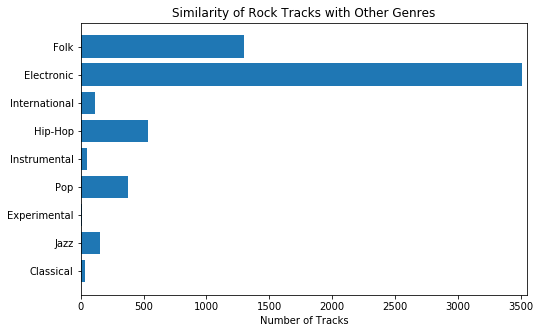

In [80]:
target_pairs, labels, base = find_genre_pairs(best_pred, second_pred,'Rock')
plot_genre_pairs(target_pairs, labels, base)

### Visualization with Plotly and Bokeh

In [87]:
from bokeh.plotting import figure, show, output_file, output_notebook, gridplot
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import Axis, Grid, Plot, HoverTool, BoxZoomTool, ResetTool, CrosshairTool, WheelZoomTool, ColumnDataSource
from bokeh.models.ranges import Range1d
from bokeh.io import curdoc, show
from bokeh import charts, plotting


In [88]:
output_notebook()

Loading BokehJS ...

In [89]:
#function to plot the bar graph of each genre
def plot_genre_similarity(best, second, genre):
    
    target, labels, base= find_genre_pairs(best, second, genre)
    df = pd.DataFrame(data = {'Genre': [k for k in labels], 'Counts': target})
    
    bar = charts.Bar(data=df, values='Counts', label='Genre', legend= None, ylabel= 'Counts', color= 'olive',
                   title='Similarity of %s Tracks with Other Genres' % base, width=800, height=500,
                    continuous_range=Range1d(0,3550))
    
    return bar 

In [90]:
#Create a panel for each tab
tabs_rock = Panel(child=plot_genre_similarity(best_pred,second_pred,'Rock'), title='Rock')
tabs_experimental = Panel(child=plot_genre_similarity(best_pred,second_pred,'Experimental'), title='Experimental')
tabs_electronic = Panel(child=plot_genre_similarity(best_pred,second_pred, 'Electronic'), title='Electronic')
tabs_hiphop = Panel(child=plot_genre_similarity(best_pred,second_pred,'Hip-Hop'), title='Hip-Hop')
tabs_folk = Panel(child=plot_genre_similarity(best_pred,second_pred,'Folk'), title='Folk')
tabs_pop = Panel(child=plot_genre_similarity(best_pred,second_pred,'Pop'), title='Pop')
tabs_instrumental = Panel(child=plot_genre_similarity(best_pred,second_pred,'Instrumental'), title='Instrumental')
tabs_international = Panel(child=plot_genre_similarity(best_pred,second_pred,'International'), title='International')
tabs_classical = Panel(child=plot_genre_similarity(best_pred,second_pred,'Classical'), title='Classical')
tabs_jazz = Panel(child=plot_genre_similarity(best_pred,second_pred,'Jazz'), title='Jazz')

#for entry in top_genre['Top_Genre'].index:
    #genre_tabs[entry] =  Panel(child=plot_genre_similarity(best_pred,second_pred,entry), title=entry)
    
#make tabs
tabs = Tabs(tabs=[tabs_rock, tabs_experimental, tabs_electronic, tabs_hiphop, tabs_folk, tabs_pop, tabs_instrumental, tabs_international, tabs_classical, tabs_jazz])
# tabs = Tabs(tabs=[tabs_rock, tabs_experimental])

show(tabs)

-------

Support Vector Machine

In [91]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='rbf')
c = np.linspace(1e-10,1,50)
parameters = {'C':c}
clf_svc = GridSearchCV(svc, parameters,cv=cross_valiator)
clf_svc.fit(X,y)

In [ ]:
pickle.dump(clf_svc, open('clf_svc.p', 'wb'))
clf_svc = pickle.load(open('clf_svc.p', 'rb'))

In [ ]:
cross_val_score(clf_svc, X, y, scoring='accuracy', cv=cross_valiator)

Decision Trees

In [ ]:
from sklearn import tree
import os

In [ ]:
clf_tree = tree.DecisionTreeClassifier('gini')
clf_tree.fit(X,y)

In [ ]:
pickle.dump(clf_tree, open('clf_tree.p', 'wb'))
clf_tree = pickle.load(open('clf_tree.p', 'rb'))

In [ ]:
cross_val_score(clf_tree, X, y, scoring='accuracy', cv=cross_valiator)